In [37]:
from keras.layers import Input, Dense, Reshape, Flatten, Conv2DTranspose, Conv2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.models import load_model
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import numpy as np
from keras import backend
from keras.constraints import Constraint
import cv2

In [34]:
#generating autoencoder noise corresponding to every image
X_train=pickle.load(open('Pickles\\imdata_ISL.pkl','rb'))
X_train = (X_train.astype(np.float32)-127.5)/127.5
encoder=load_model('text-2-sign\\encoder.h5')
X_train_noise=encoder.predict(X_train)

In [18]:
X_train.shape

(2000, 120, 160, 3)

In [35]:
model=load_model('text-2-sign\\GAN_autoencoder_models_ISL(increased noise)\\generator_model_test_autoencode_ISL_9000.h5')

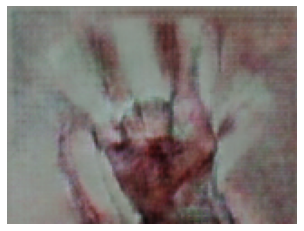

In [36]:
for i in range(25):
    idn=np.random.randint(0,X_train_noise.shape[0],1)
    noise=X_train_noise[idn]
    #noise=np.random.normal(0,1,(1,256))
    gen_img=model.predict(noise)
    #rescale images 0-1
    gen_img=0.5*gen_img+0.5
    plt.imshow(gen_img[0,:,:,:])
    plt.axis('off')
    plt.savefig('Images_Inspect\\%d.png'%i,bbox_inches='tight',pad_inches = 0)